<a href="https://colab.research.google.com/github/Savarezi/Venda-Insights/blob/main/Panorama_Comercial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Análise de Vendas 📊 — Projeto em Python para explorar dados de vendas, identificando produtos e clientes mais lucrativos, desempenho por categorias e marcas, além da evolução do faturamento ao longo do tempo. Visualizações claras ajudam a transformar dados em decisões estratégicas. 🚀

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("Vendas.xlsx")

* Mostrar tipo de Dados


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203888 entries, 0 to 203887
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Data da Venda   203888 non-null  object 
 1   Produto         203882 non-null  object 
 2   Categoria       203882 non-null  object 
 3   PrecoUnitario   203882 non-null  float64
 4   Custo Unitário  203882 non-null  float64
 5   Marca           203882 non-null  object 
 6   Qtd. Vendida    203882 non-null  float64
 7   Nome Cliente    203882 non-null  object 
 8   Localidade      203882 non-null  object 
 9   Unnamed: 9      2 non-null       object 
dtypes: float64(3), object(7)
memory usage: 15.6+ MB


* Mostrar Colunas

In [ ]:
df.columns

Index(['Data da Venda', 'Produto', 'Categoria', 'PrecoUnitario',
       'Custo Unitário', 'Marca', 'Qtd. Vendida', 'Nome Cliente', 'Localidade',
       'Unnamed: 9'],
      dtype='object')

In [ ]:
df.describe()

,PrecoUnitario,Custo Unitário,Qtd. Vendida
count,203882.000000,203882.000000,203882.000000
mean,159.804995,66.437852,1.986880
std,224.677022,85.880331,1.408089
min,4.980000,2.540000,1.000000
25%,8.990000,4.130000,1.000000
50%,70.130000,32.250000,1.000000
75%,181.000000,82.320000,3.000000
max,1650.000000,546.680000,5.000000


 * Lucro Total por Produto

 Os 10 produtos mais vendidos:

In [ ]:
df['lucro'] = (df['PrecoUnitario'] - df['Custo Unitário']) * df['Qtd. Vendida']
lucro_produto = df.groupby('Produto')['lucro'].sum().sort_values(ascending=False)

lucro_produto.head(10)  # Top 10 produtos mais lucrativos


,lucro
Produto,
Telephoto Conversion Lens X400 Prata,7110156.06
DVD M360 Preto,2914800.58
LCD24 X300 Preto,1261785.60
LCD24 X300 Branco,1104062.40
LCD24W X300 Preto,826295.76
LCD19W M100 Branco,451302.24
LCD22W M2001 Preto,449489.70
Sistema de Som 7.1 Channel X711 Marrom,449391.42
Sistema de Som 7.1 Channel X711 Prata,447166.71


* Grafico para os 10 produtos mais vendidos

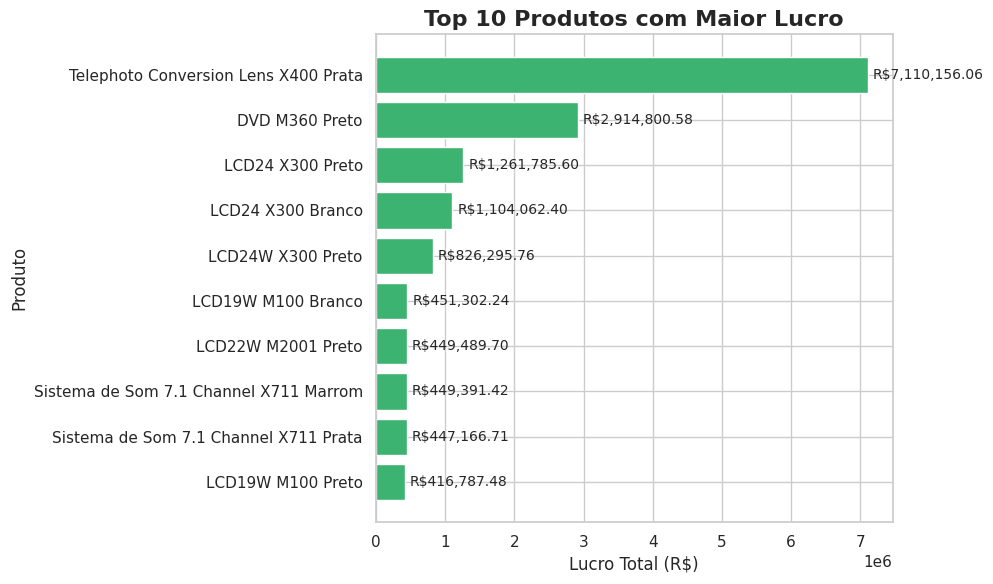

In [ ]:
import matplotlib.pyplot as plt

# Seleciona top 10 produtos por lucro
top_lucro = lucro_produto.head(10)

# Configura o tamanho da figura
plt.figure(figsize=(10,6))

# Gráfico de barras horizontais
plt.barh(top_lucro.index, top_lucro.values, color='mediumseagreen')

# Inverter o eixo Y para o produto com maior lucro ficar no topo
plt.gca().invert_yaxis()

# Adicionar título e rótulos
plt.title('Top 10 Produtos com Maior Lucro', fontsize=16, fontweight='bold')
plt.xlabel('Lucro Total (R$)')
plt.ylabel('Produto')

# Mostrar valores ao lado das barras
for i, v in enumerate(top_lucro.values):
    plt.text(v + max(top_lucro.values)*0.01, i, f'R${v:,.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


 * Faturamento Total por Cliente (Top 10)

In [ ]:
# Criar a coluna faturamento (preço unitário × quantidade)

df['faturamento'] = df['PrecoUnitario'] * df['Qtd. Vendida']


In [ ]:
# Agrupar por cliente e somar faturamento

faturamento_cliente = df.groupby('Nome Cliente')['faturamento'].sum().sort_values(ascending=False).head(10)


* Gráfico de barras horizontais simples

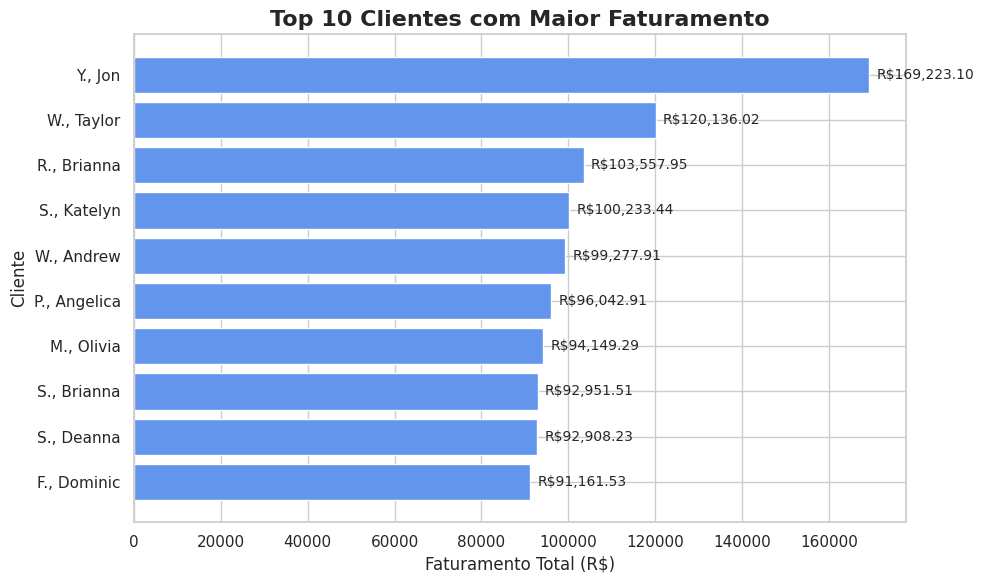

In [ ]:

plt.figure(figsize=(10,6))
plt.barh(faturamento_cliente.index, faturamento_cliente.values, color='cornflowerblue')
plt.gca().invert_yaxis()  # maior no topo

plt.title('Top 10 Clientes com Maior Faturamento', fontsize=16, fontweight='bold')
plt.xlabel('Faturamento Total (R$)')
plt.ylabel('Cliente')

# Valores ao lado das barras
for i, v in enumerate(faturamento_cliente.values):
    plt.text(v + max(faturamento_cliente.values)*0.01, i, f'R${v:,.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


* Quantidade Vendida por Categoria

In [ ]:
# Agrupar por categoria e somar quantidade vendida

qtd_categoria = df.groupby('Categoria')['Qtd. Vendida'].sum().sort_values(ascending=False)


/tmp/ipython-input-26-691112868.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=qtd_categoria.index, y=qtd_categoria.values, palette='mako')


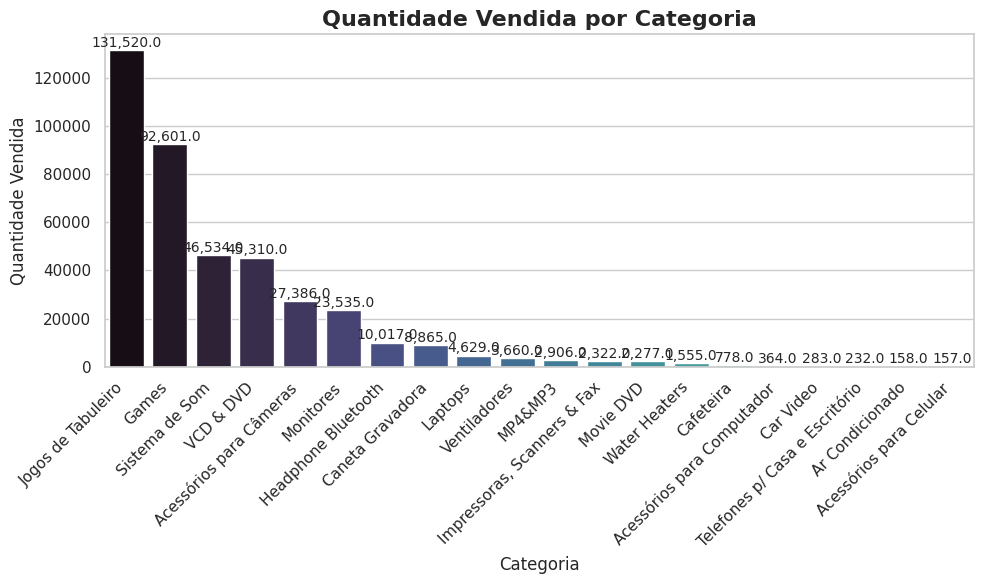

In [ ]:
 # Gráfico de barras verticais

plt.figure(figsize=(10,6))
sns.barplot(x=qtd_categoria.index, y=qtd_categoria.values, palette='mako')

plt.title('Quantidade Vendida por Categoria', fontsize=16, fontweight='bold')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45, ha='right')

# Valores acima das barras
for i, v in enumerate(qtd_categoria.values):
    plt.text(i, v + max(qtd_categoria.values)*0.01, f'{v:,}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

* Lucro por Marca

In [ ]:
# Calcular lucro por marca

lucro_marca = df.groupby('Marca')['lucro'].sum().sort_values(ascending=False)


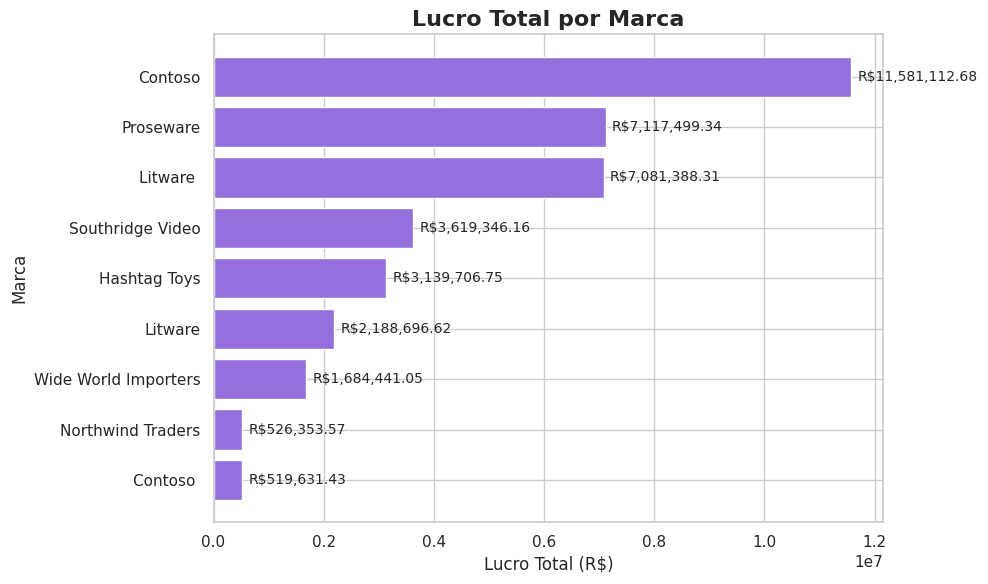

In [ ]:


plt.figure(figsize=(10,6))
plt.barh(lucro_marca.index, lucro_marca.values, color='mediumpurple')
plt.gca().invert_yaxis()

plt.title('Lucro Total por Marca', fontsize=16, fontweight='bold')
plt.xlabel('Lucro Total (R$)')
plt.ylabel('Marca')

# Valores ao lado das barras
for i, v in enumerate(lucro_marca.values):
    plt.text(v + max(lucro_marca.values)*0.01, i, f'R${v:,.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()
